# 1. Loading Data

In [14]:
iris <- read.csv(url("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"), header = FALSE, stringsAsFactors = FALSE)
names(iris) <- c("Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width", "Species")
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa


# 2. Plot to see clusters

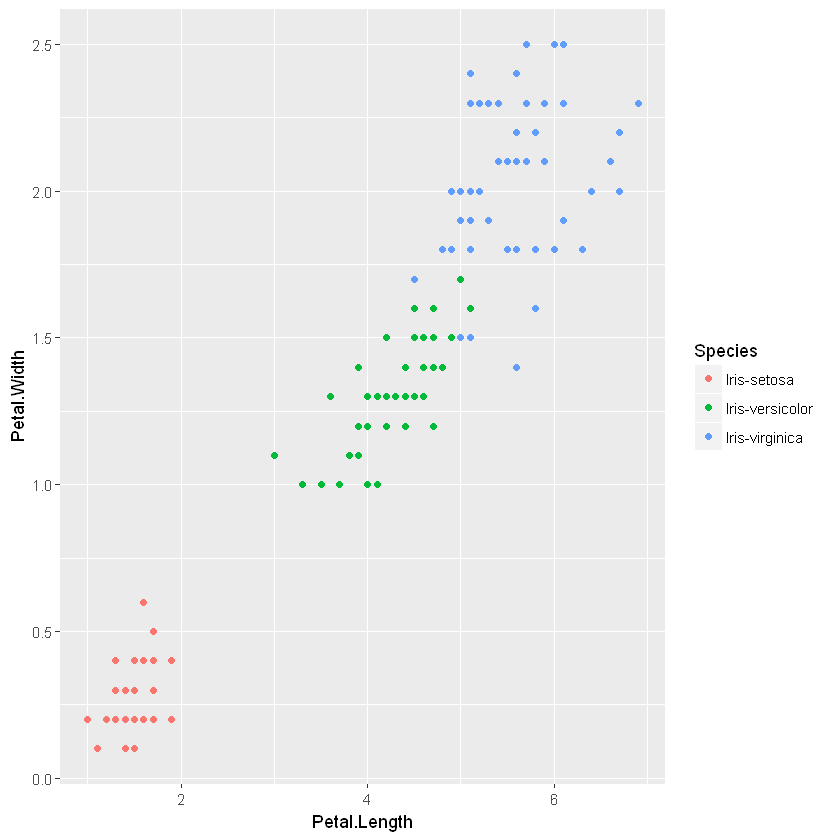

In [15]:
library(ggplot2)
ggplot(iris, aes(Petal.Length, Petal.Width, color = Species)) + geom_point()

# 3) Elbow Method for finding the optimal number of clusters k

[1] 596.00000 222.24046 140.02604 113.60040  90.39576  79.60574  70.38680
 [8]  62.03016  54.23333  47.04607

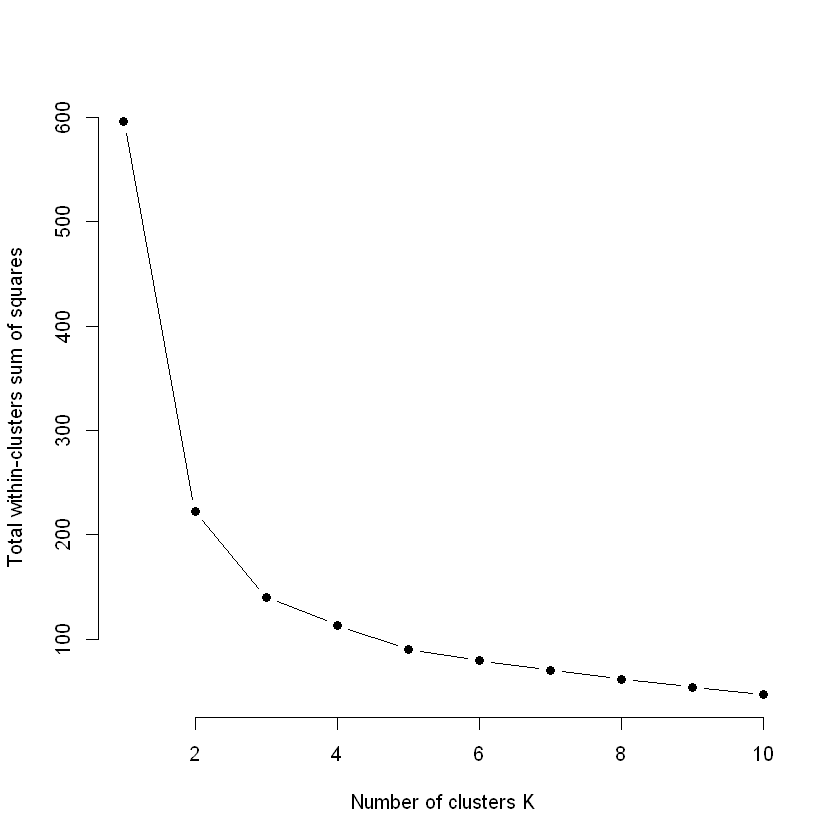

In [26]:
scaled_data = as.matrix(scale(iris[1:4]))
#Elbow Method for finding the optimal number of clusters
set.seed(123)
# Compute and plot wss for k = 1 to k = 15.
k.max <- 10
data <- scaled_data
wss <- sapply(1:k.max, 
              function(k){kmeans(data, k, nstart=50,iter.max = 15 )$tot.withinss})
wss
plot(1:k.max, wss,
     type="b", pch = 19, frame = FALSE, 
     xlab="Number of clusters K",
     ylab="Total within-clusters sum of squares")

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


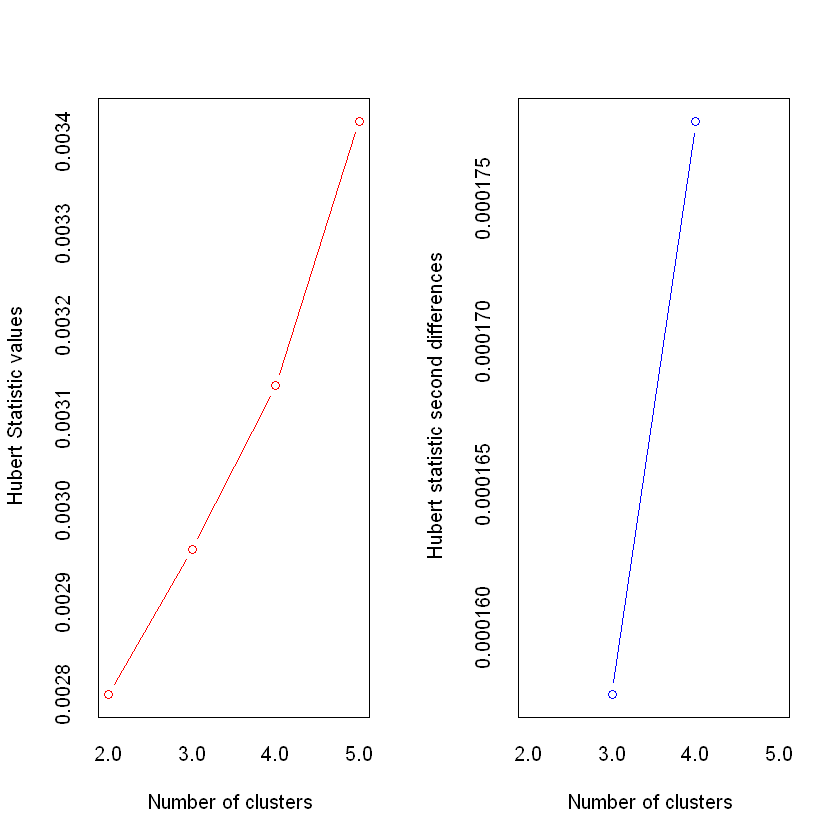

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 9 proposed 2 as the best number of clusters 
* 12 proposed 3 as the best number of clusters 
* 3 proposed 5 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


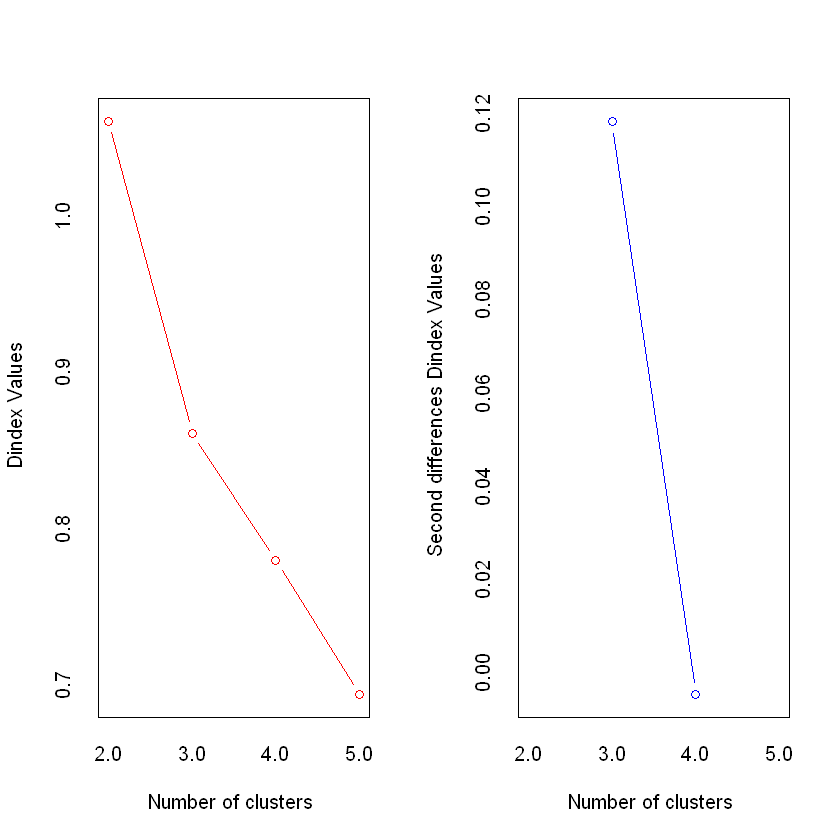

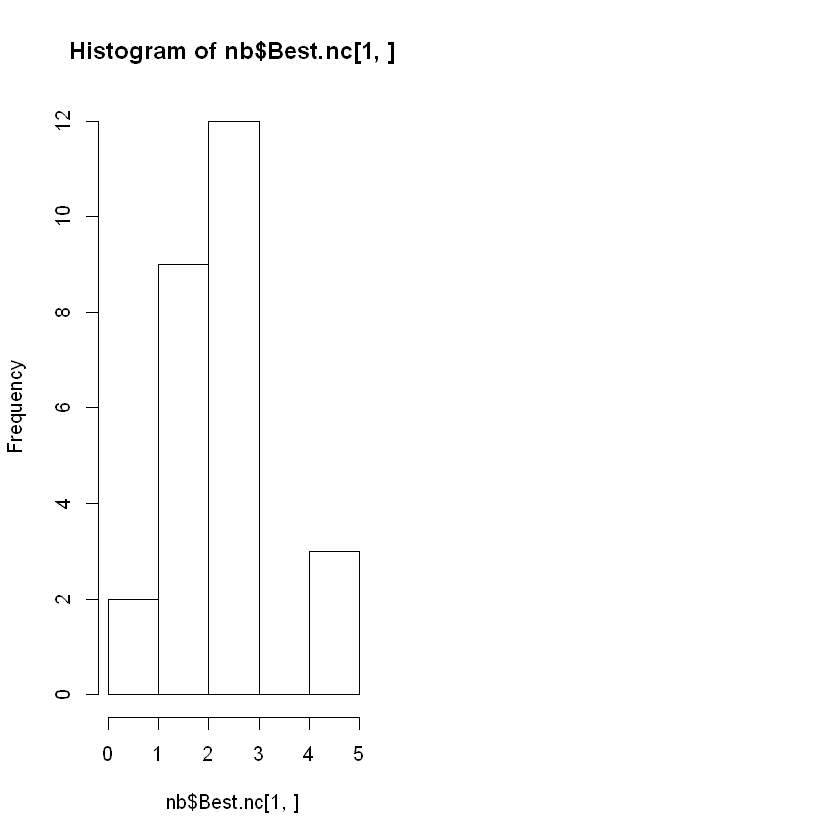

In [41]:
#install.packages("NbClust",dependencies = TRUE)
library(NbClust)
nb <- NbClust(scaled_data, diss=NULL, distance = "euclidean", 
              min.nc=2, max.nc=5, method = "kmeans", 
              index = "all", alphaBeale = 0.1)
hist(nb$Best.nc[1,], breaks = max(na.omit(nb$Best.nc[1,])))

# 4. kmean() model

In [35]:
set.seed(20)
irisCluster <- kmeans(iris[, 3:4], 3, nstart = 20)
irisCluster

K-means clustering with 3 clusters of sizes 50, 52, 48

Cluster means:
  Petal.Length Petal.Width
1     1.464000    0.244000
2     4.269231    1.342308
3     5.595833    2.037500

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 2 3 3 3 3
[112] 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3
[149] 3 3

Within cluster sum of squares by cluster:
[1]  2.03840 13.05769 16.29167
 (between_SS / total_SS =  94.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [36]:
table(irisCluster$cluster, iris$Species)

   
    Iris-setosa Iris-versicolor Iris-virginica
  1          50               0              0
  2           0              48              4
  3           0               2             46